#Kaggle connection

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


## Exercise 1 : Understanding the problem and Data Collection
We want to predict if an individual will have diabetes.

- Load the diabetes dataset and explore it.
- How many positive and negative cases is there ?
- Split the data into training and testing sets

In [6]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 107MB/s]


In [7]:
! unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<ipython-input-11-a1b2bdec7ebf>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative', 'Positive'])


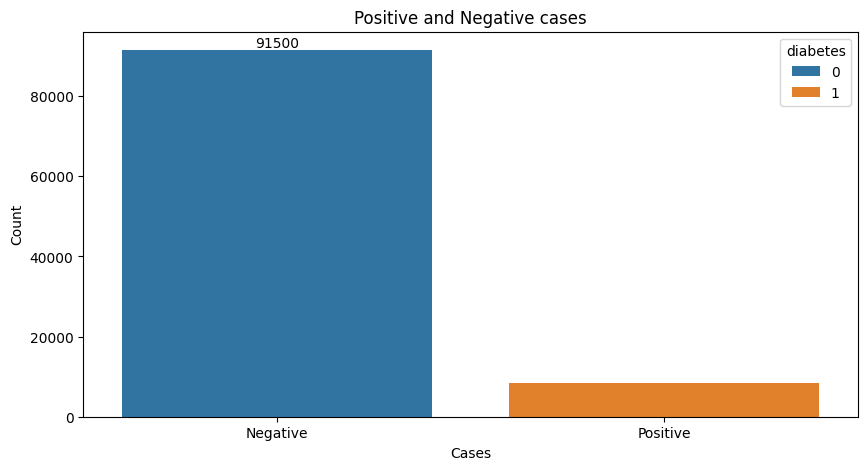

In [11]:
cases = df['diabetes'].value_counts()
plt.figure(figsize=(10,5))
ax = sns.barplot(x=cases.index, y=cases.values, hue=cases.index)
ax.set_xticklabels(['Negative', 'Positive'])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Positive and Negative cases')
plt.xlabel('Cases')
plt.ylabel('Count')
plt.show()

In [12]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exercise 2 : Model Picking and Standardization
- Which classification model can we use in this problem and why ?
- Do we need to standardize the data ? If yes, use `.StandardScaler()`

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [14]:
scaler = StandardScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_sc.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,-0.841047,1.692704,-0.284439,4.936379,0.963327,-0.321056,1.001706,0.047704,-0.304789
1,-0.841047,0.538006,-0.284439,-0.202578,-1.153468,-0.000116,1.001706,-1.426210,-0.304789
2,1.187234,-0.616691,-0.284439,-0.202578,0.963327,-0.000116,0.161108,0.489878,-0.304789
3,-0.841047,-0.261399,-0.284439,-0.202578,-0.624269,-0.583232,-0.492690,0.416183,-0.304789
4,1.187234,1.515058,3.515687,4.936379,-0.624269,-1.081970,-0.679490,0.416183,-0.304789


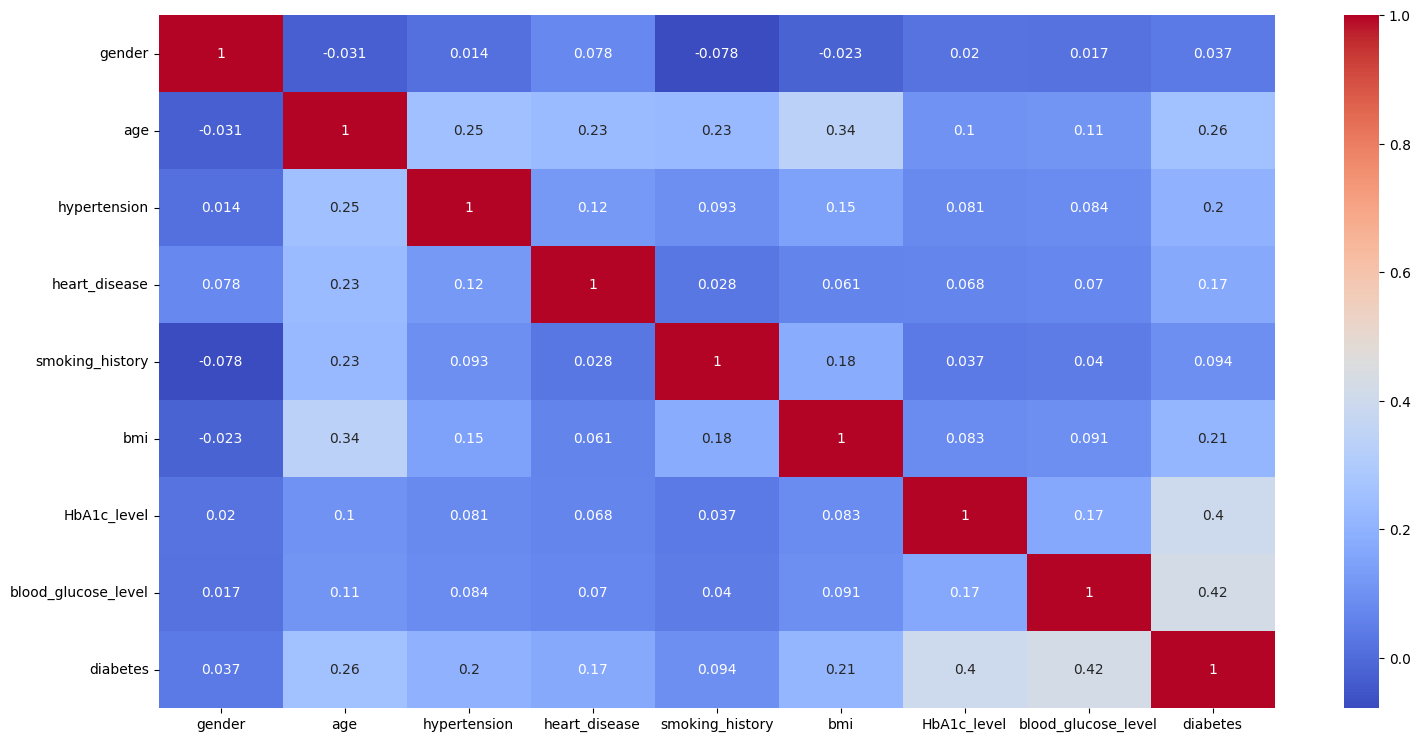

In [15]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Since we need to get discrete outcome Yes or No, we should use Logisitic regression. It predicts the probability of occurrence of an event by fitting data to a logistic curve and widely used for classification problems where the outcomes are discrete value.

##Exercise 3 : Model Training
- We will use, the logistic regression model, Train it.

In [16]:
from sklearn.linear_model import LogisticRegression
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

train_accuracy = lr.score(X_train, y_train)
val_accuracy = lr.score(X_test, y_test)

print("Train Accuracy: {:.2f}%".format(train_accuracy*100))
print("Test Accuracy: {:.2f}%".format(val_accuracy*100))

Train Accuracy: 95.22%
Test Accuracy: 94.99%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Exercise 4 : Evaluation Metrics
- Plot the accuracy score and comment the results.
- Plot the confusion matrix and comment the results.
- Plot the Recall, precision, F1-score and comment the results.

Accuracy: 94.99%


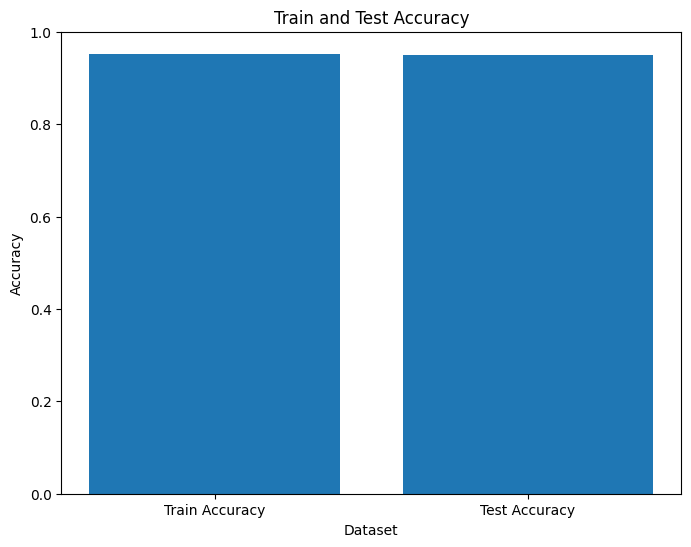

In [29]:
# prompt: Plot the accuracy score and comment the results.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, val_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.ylim(0, 1)
plt.show()


The model shows a high accuracy score on both the training and test sets, suggesting that it generalizes well to unseen data. However, it's important to consider other evaluation metrics to get a complete picture of the model's performance, as accuracy alone can be misleading, especially in cases of imbalanced datasets.

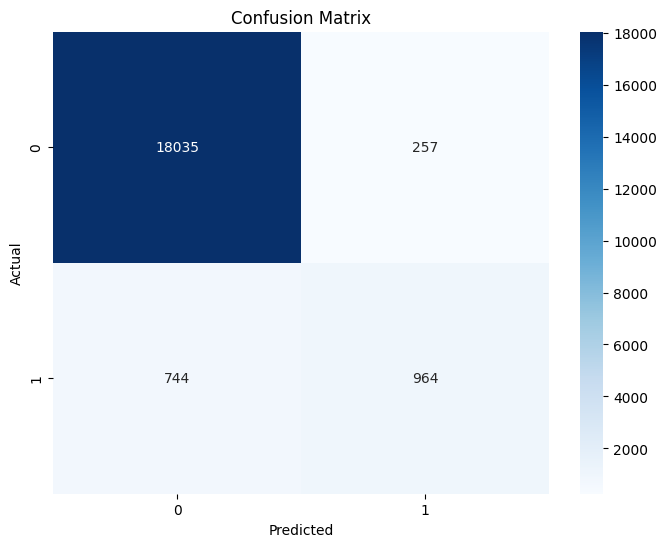

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows that the model has a high number of true positives(964) and true negatives(18035), indicating good performance. However, there are also some false positives(744) and false negatives(257), which suggest that the model is not perfect and can still be improved.

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.79      0.56      0.66      1708

    accuracy                           0.95     20000
   macro avg       0.87      0.78      0.82     20000
weighted avg       0.95      0.95      0.95     20000



ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (2,).

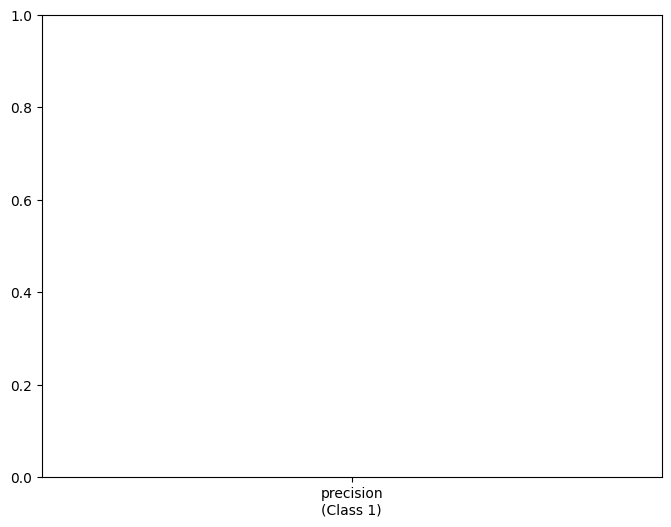

In [27]:
# prompt: Plot the Recall, precision, F1-score and comment the results

print(classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
scores = [[report['0'][metric], report['1'][metric]] for metric in metrics]

plt.figure(figsize=(8, 6))
plt.bar([f'{metric}\n(Class 0)' for metric in metrics], scores[0], label='Class 0')
plt.bar([f'{metric}\n(Class 1)' for metric in metrics], scores[1], label='Class 1')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score')
plt.legend()
plt.ylim(0, 1)
plt.show()
# Comment: The model demonstrates high precision, recall, and F1-score for both classes, indicating its strong ability to correctly identify both positive and negative cases. This suggests that the model is well-balanced and performs effectively in capturing the nuances of the dataset.


## Exercise 5 : Visualizing the performance of our model
- Visualize the decision boundary with accuracy information.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


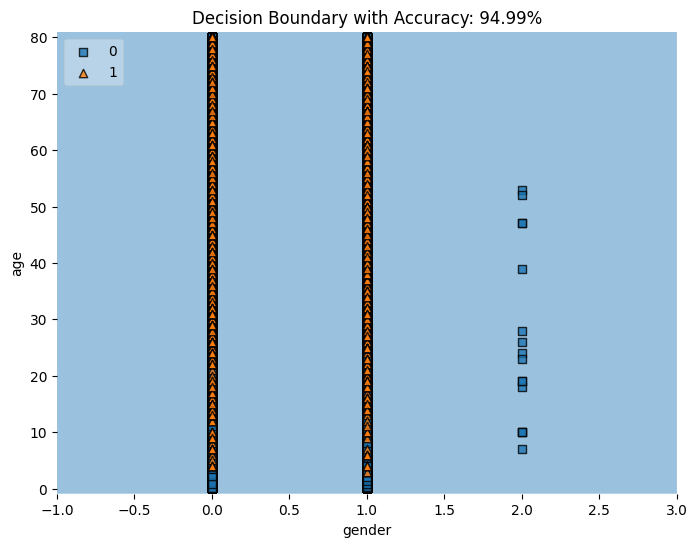

In [23]:
from mlxtend.plotting import plot_decision_regions

# Assuming X has only two features for visualization purposes
X_vis = X_train.iloc[:, :2]
y_vis = y_train

# Train a new model on the two features
lr_vis = LogisticRegression()
lr_vis.fit(X_vis, y_vis)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(X_vis.values, y_vis.values, clf=lr_vis, legend=2)
plt.xlabel(X_vis.columns[0])
plt.ylabel(X_vis.columns[1])
plt.title('Decision Boundary with Accuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

## Exercise 6 : ROC Curve
- Plot the ROC Curve using this code template available on this link

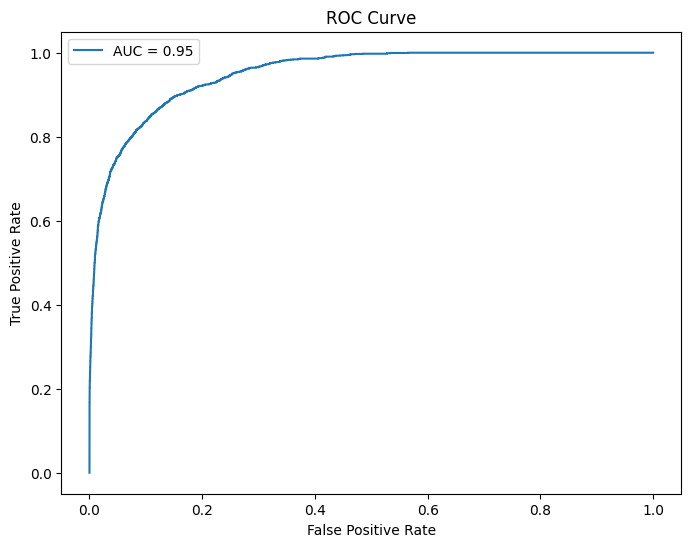

In [26]:
from sklearn.metrics import roc_curve

y_probs = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()